In [1]:
import pymc
import theano
import copy
import importlib
import numpy as np
import pandas as pn
import math
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'


import sys

sys.path.append("../../../gempy")
import gempy as gp
#from gempy import Topology as tp

# sys.path.append("../../pynoddy")
# import pynoddy
# import pynoddy.history
# import pynoddy.output
# import pynoddy.events
# import pynoddy.experiment

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
geo_data = gp.create_data([337000, 400000, 6640000, 6710000, -18000, 1000],
                          resolution = [100,100,100])

geo_data.import_data_csv("input_data/Paper_GU2F_sc_faults_topo_Points.csv", 
                         "input_data/Paper_GU2F_sc_faults_topo_Foliations.csv")

geo_data.calculate_gradient()

In [3]:
a = geo_data.interfaces['formation']
a.cat.set_categories(1, 'Cadda')

TypeError: 'ordered' must either be 'True' or 'False'

In [4]:
np.unique(geo_data.interfaces["formation"])

array(['Abrolhos_Transfer', 'Cadda', 'Cattamarra', 'Coomallo',
       'Cretaceous', 'Darling', 'Eneabba', 'Eneabba_South', 'Hypo_fault_E',
       'Hypo_fault_W', 'Lesueur', 'Permian', 'Urella_North',
       'Urella_South', 'Woodada_Kockatea', 'Yarragadee', 'basement'], dtype=object)

In [5]:
geo_data.interfaces = geo_data.interfaces[geo_data.interfaces["formation"] != "Cadda"]
geo_data.orientations = geo_data.orientations[geo_data.orientations["formation"] != "Cadda"]
geo_data.interfaces = geo_data.interfaces[geo_data.interfaces["formation"] != "Woodada_Kockatea"]
geo_data.orientations = geo_data.orientations[geo_data.orientations["formation"] != "Woodada_Kockatea"]
geo_data.interfaces = geo_data.interfaces[geo_data.interfaces["formation"] != "Cattamarra"]
geo_data.orientations = geo_data.orientations[geo_data.orientations["formation"] != "Cattamarra"]

In [7]:
gp.set_series(geo_data, 
              {# "fault_Abrolhos_Transfer": ["Abrolhos_Transfer"],
               "fault_Coomallo": ["Coomallo"],
               "fault_Eneabba_South": ["Eneabba_South"],
               "fault_Hypo_fault_W": ["Hypo_fault_W"],
               "fault_Hypo_fault_E": ["Hypo_fault_E"],
               "fault_Urella_North": ["Urella_North"],
               "fault_Urella_South": ["Urella_South"],
               "fault_Darling": ["Darling"],
               "Sedimentary_Series": ['Cretaceous', 
                                  'Yarragadee', 
                                  #'Cadda', 
                                  #'Cattamarra', 
                                  'Eneabba',
                                  'Lesueur',
                                  #'Woodada_Kockatea', 
                                  'Permian']
               # "fault_Eneabba_North": ["Eneabba_North"]
              }, order_series = ["fault_Abrolhos_Transfer",
                                  "fault_Coomallo",
                                  "fault_Eneabba_South",
                                  "fault_Hypo_fault_W",
                                  "fault_Hypo_fault_E",
                                  "fault_Urella_North",
                                  "fault_Darling",
                                  "fault_Urella_South",
                                  "Sedimentary_Series"],
              order_formations= ["Abrolhos_Transfer",
                                 "Coomallo",
                                 "Eneabba_South",
                                 "Hypo_fault_W",
                                 "Hypo_fault_E",
                                 "Urella_North",
                                 "Urella_South", 
                                 "Darling",
                                   
                                      'Cretaceous', 
                                      'Yarragadee', 
                                      #'Cadda', 
                                      #'Cattamarra', 
                                      'Eneabba',
                                      'Lesueur',
                                      #'Woodada_Kockatea', 
                                      'Permian'])

# geo_data.set_formation_number()
# geo_data.order_table()

In [8]:
/

AttributeError: 'InputData' object has no attribute 'fault_relation'

In [7]:
#geo_data = gp.select_series(geo_data, ["fault_Hypo_fault_W",  "fault_Hypo_fault_E", "Sedimentary_Series"]) # "fault_Hypo_fault_E",

In [8]:
geo_data.get_formations()

array(['Abrolhos_Transfer', 'Coomallo', 'Eneabba_South', 'Hypo_fault_W',
       'Hypo_fault_E', 'Urella_North', 'Darling', 'Urella_South',
       'Cretaceous', 'Yarragadee', 'Eneabba', 'Lesueur', 'Permian'], dtype=object)

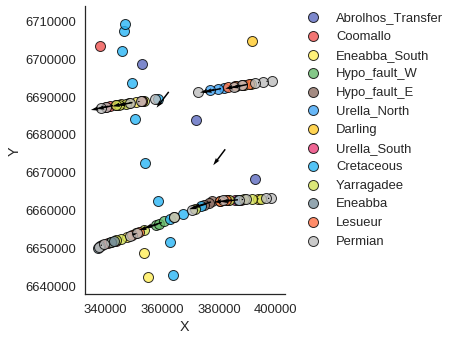

In [8]:
%matplotlib inline
gp.plot_data(geo_data, direction='z')
plt.tight_layout()
#plt.savefig("input_data.pdf")

In [10]:
#gp.plot_data_3D(geo_data)

In [11]:
theano.config.optimizer_excluding

'constant_folding_opt'

In [9]:
interp_data = gp.InterpolatorData(geo_data, dtype="float64", compile_theano=True, theano_optimizer='fast_run')

ValueError: ('count < 0', 'occurred at index X')

In [14]:
new_grid = gp.GridClass()
res = 50

# Create a new grid object with the new resolution
new_grid.create_regular_grid_3d(geo_data.extent,[res, res, res])

# Setting the new grid to the geodata
gp.set_grid(geo_data, new_grid)

interp_data.update_interpolator(geo_data)

In [9]:
lith_block, fault_block = gp.compute_model(interp_data)

In [ ]:
gp.plot_potential_field(geo_data, lith_block[1], 0)

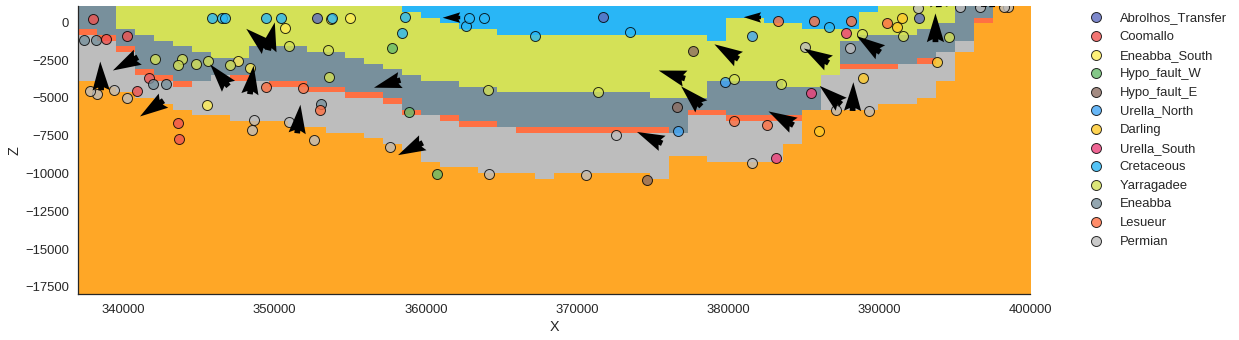

In [16]:
gp.plot_section(geo_data, lith_block[0], 12, direction="y", plot_data=True)

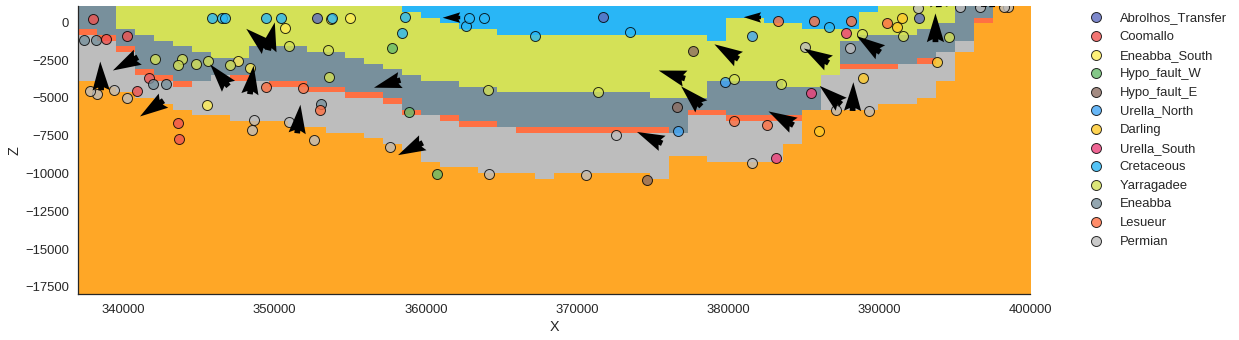

In [17]:
gp.plot_section(geo_data, lith_block[0], 12, direction="y", plot_data=True)

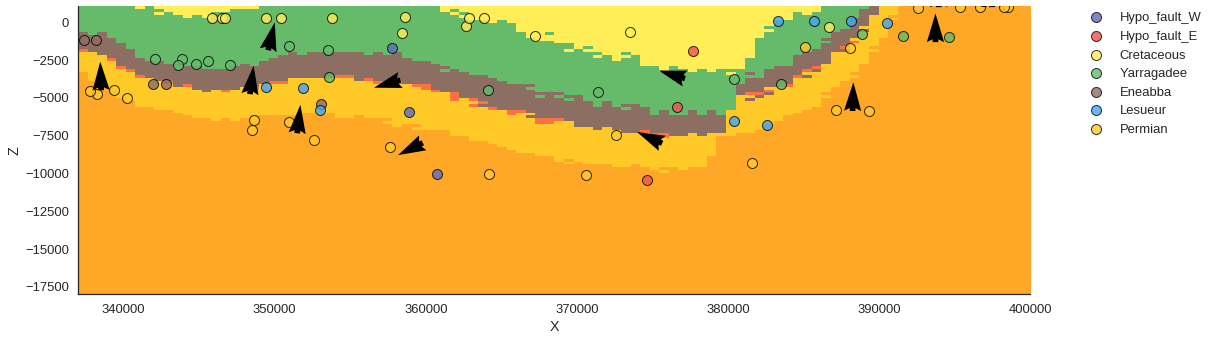

In [19]:
gp.plot_section(geo_data, lith_block[0], 12, direction="y", plot_data=True)

In [27]:
2.824810/3

0.9416033333333332

In [ ]:
interp_data.th_fn.profile.summary()

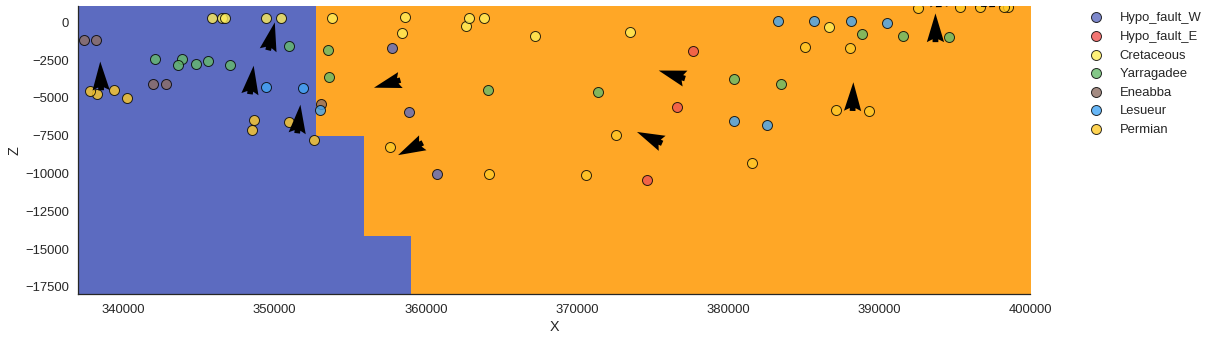

In [17]:
gp.plot_section(geo_data, fault_block[0], 12, direction="y", plot_data=True)

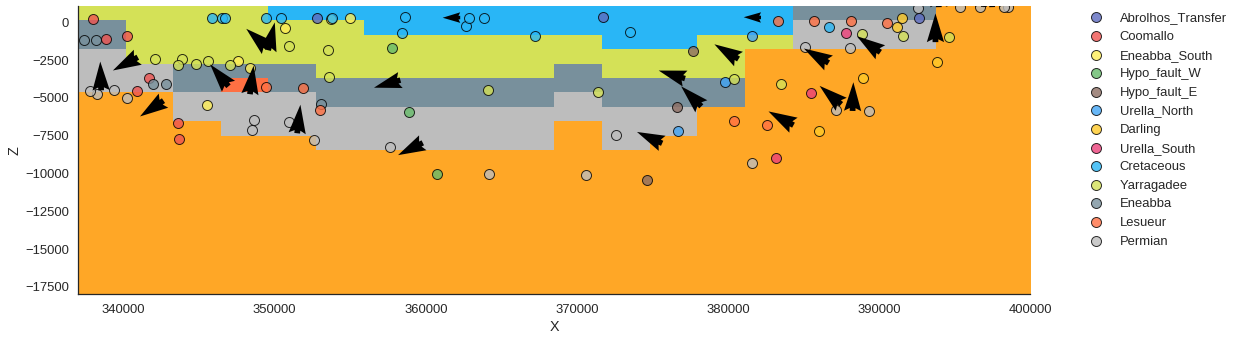

In [12]:
gp.plot_section(geo_data, lith_block[0], 12, direction="y", plot_data=True)

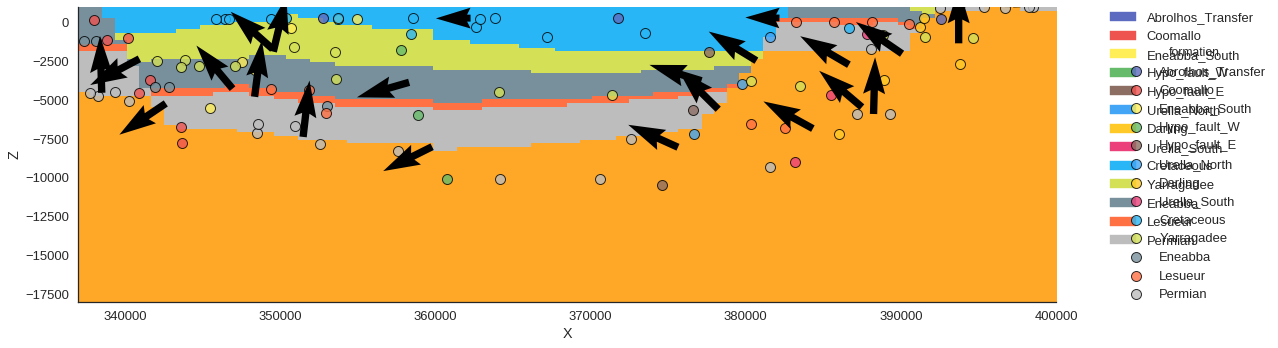

In [9]:
gp.plot_section(geo_data, lith_block[0], 60, direction="y", plot_data=True)

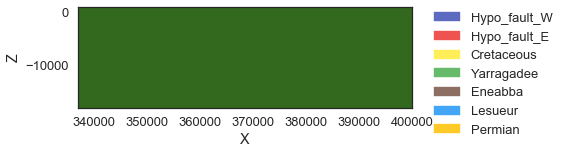

In [185]:
gp.plot_section(geo_data, fault_block[1], 5, direction="y")

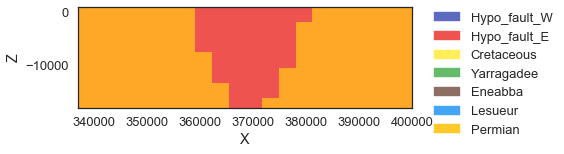

In [186]:
gp.plot_section(geo_data, fault_block[2], 5, direction="y")

In [13]:
gp.plot_data_3D(geo_data)

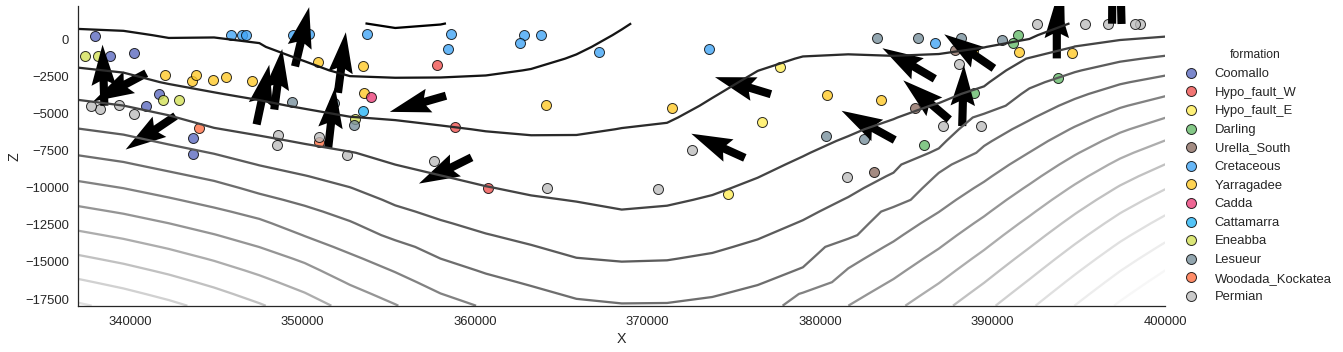

In [90]:
gp.plot_potential_field(geo_data, lith_block[1], 15)

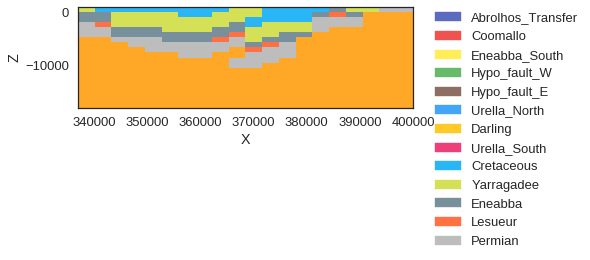

In [12]:
gp.plot_section(geo_data, lith_block[0], 15)

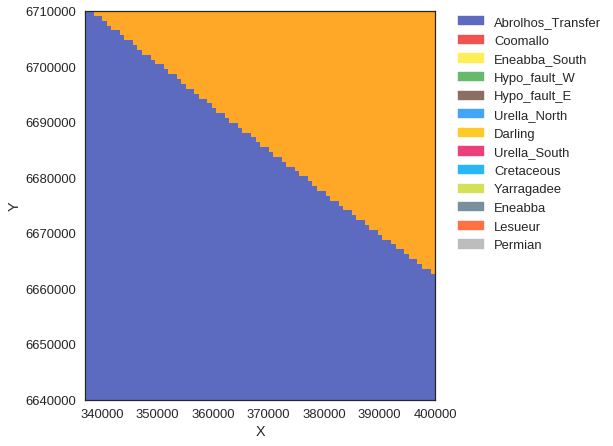

In [10]:
gp.plot_section(geo_data, fault_block[0], 20, direction="z")

In [22]:
gp.plot_data_3D(geo_data)

In [24]:
interp_data.potential_at_interfaces[7]

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,  -8.03554983e+14,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00])

In [32]:
fault_block[-1]

array([ -8.03554983e+14,  -8.03554983e+14,  -8.03554983e+14, ...,
         5.08956401e+02,   5.08956816e+02,   5.08957232e+02])

In [29]:
fault_block[-1].max()

803554982958371.5

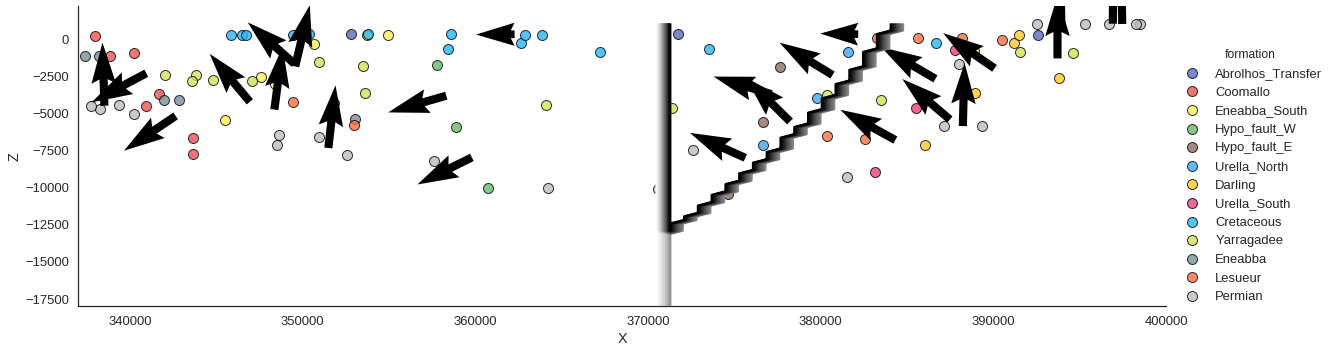

In [31]:
gp.plot_potential_field(geo_data, fault_block[-1], 50)

In [20]:
 lith_block[1].max(),  lith_block[1].min()

(551.38150216928921, 551.00774262453774)

In [17]:
fault_block[1::2]

array([[  9.50102603e+02,   9.50103161e+02,   9.50103714e+02, ...,
          9.49780369e+02,   9.49780396e+02,   9.49780437e+02],
       [  9.19867931e+02,   9.19867570e+02,   9.19867207e+02, ...,
          9.09862279e+02,   9.09862187e+02,   9.09862101e+02],
       [  8.17520543e+02,   8.17521060e+02,   8.17521582e+02, ...,
          8.33687966e+02,   8.33688297e+02,   8.33688632e+02],
       ..., 
       [  6.42983847e+02,   6.42984107e+02,   6.42984366e+02, ...,
          6.71382001e+02,   6.71383088e+02,   6.71384178e+02],
       [  6.26092581e+02,   6.26092721e+02,   6.26092860e+02, ...,
          6.26027527e+02,   6.26029042e+02,   6.26030557e+02],
       [ -8.03554983e+14,  -8.03554983e+14,  -8.03554983e+14, ...,
          5.08956401e+02,   5.08956816e+02,   5.08957232e+02]])

In [10]:
ver, sim = gp.get_surfaces(interp_data, lith_block[1], fault_block[1::2], original_scale=True)

In [25]:
# np.save('ver.npy', ver)
# np.save('sim.npy', sim)
# np.save('lith.npy', lith_block[0])

In [4]:
ver = np.load('ver.npy')
sim = np.load('sim.npy')
lith_block = np.load('lith.npy')

In [12]:
ste = gp.steno3D(geo_data, 'PerthBasin')


You are already logged in as @leguark. To log in as a different user
please `steno3d.logout()`, then login specifying a different
username or API developer key.




In [14]:
ste.plot3D_steno_grid(lith_block)
ste.plot3D_steno_surface(ver, sim)

/home/miguel/anaconda3/lib/python3.6/site-packages/properties/base/base.py:256: FutureWarning: 
Property 'x0' is deprecated and may be removed in the future. Please use 'O'.
  if not hasattr(self, key) and key not in self._props.keys():
/home/miguel/anaconda3/lib/python3.6/site-packages/properties/base/base.py:259: FutureWarning: 
Property 'x0' is deprecated and may be removed in the future. Please use 'O'.
  setattr(self, key, val)


In [15]:
ste.proj.upload()

Verifying your quota for public projects...
This PUBLIC project will be viewable by everyone.
Total progress: 100% - Uploading: project PerthBasin
Complete!
https://steno3d.com/app/mWACfOTPB2vT3scgJABp


'https://steno3d.com/app/mWACfOTPB2vT3scgJABp'

In [24]:
np.ones(geo_data.resolution[0]) * (geo_data.extent[0] - geo_data.extent[1]) /(geo_data.resolution[0] - 1) +geo_data.extent[0]

array([ 336363.63636364,  336363.63636364,  336363.63636364,
        336363.63636364,  336363.63636364,  336363.63636364,
        336363.63636364,  336363.63636364,  336363.63636364,
        336363.63636364,  336363.63636364,  336363.63636364,
        336363.63636364,  336363.63636364,  336363.63636364,
        336363.63636364,  336363.63636364,  336363.63636364,
        336363.63636364,  336363.63636364,  336363.63636364,
        336363.63636364,  336363.63636364,  336363.63636364,
        336363.63636364,  336363.63636364,  336363.63636364,
        336363.63636364,  336363.63636364,  336363.63636364,
        336363.63636364,  336363.63636364,  336363.63636364,
        336363.63636364,  336363.63636364,  336363.63636364,
        336363.63636364,  336363.63636364,  336363.63636364,
        336363.63636364,  336363.63636364,  336363.63636364,
        336363.63636364,  336363.63636364,  336363.63636364,
        336363.63636364,  336363.63636364,  336363.63636364,
        336363.63636364,

In [18]:
h1=np.ones(geo_data.resolution[0]) * (geo_data.extent[0] - geo_data.extent[1]) /
                                                                         (geo_data.resolution[0] - 1) +geo_data.extent[0],
                                  h2=np.ones(self._data.resolution[1]) * (self._data.extent[2] - self._data.extent[3]) /
                                                                         (self._data.resolution[1] - 1) + self._data.extent[2],
                                  h3=np.ones(self._data.resolution[2]) * (self._data.extent[4] - self._data.extent[5]) /
                                                                         (self._data.resolution[2] - 1) + self._data.extent[4])

'Nothing'

In [16]:
geo_data.extent

array([ 337000,  400000, 6640000, 6710000,  -18000,    1000])

In [15]:
ver

[array([[  3.38673115e+05,   6.70930000e+06,  -1.80000000e+04],
        [  3.38668405e+05,   6.70930000e+06,  -1.78100000e+04],
        [  3.38890000e+05,   6.70912576e+06,  -1.78100000e+04],
        ..., 
        [  3.99370000e+05,   6.66258018e+06,   4.30000000e+02],
        [  3.99370000e+05,   6.66258322e+06,   6.20000000e+02],
        [  3.99370000e+05,   6.66258581e+06,   8.10000000e+02]]),
 array([[  3.37553200e+05,   6.64000000e+06,  -2.23000000e+03],
        [  3.37630000e+05,   6.64000000e+06,  -2.36362709e+03],
        [  3.37630000e+05,   6.64058947e+06,  -2.23000000e+03],
        ..., 
        [  3.51511558e+05,   6.67640000e+06,  -1.80000000e+04],
        [  3.51506768e+05,   6.67710000e+06,  -1.80000000e+04],
        [  3.51495989e+05,   6.67780000e+06,  -1.80000000e+04]]),
 array([[  3.37000000e+05,   6.64000000e+06,  -9.49715355e+03],
        [  3.37000000e+05,   6.64042883e+06,  -9.45000000e+03],
        [  3.37076637e+05,   6.64000000e+06,  -9.45000000e+03],
        

In [12]:
gp.plot_surfaces_3D(interp_data.geo_data_res, ver, sim, alpha=1)


In [13]:
np.save('perth_ver', ver)
np.save('perth_sim', sim)